In [11]:
# Standard library imports
from pathlib import Path

# Third party imports
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import rasterio as rio

# Local imports



# Constants
DATA_DIR = Path(r"C:\Users\Peter\gh\rasmussen-705.603\data\FinalProject")
# Cleanup / outlier detection params
WINDOW = 10
START_INDEX = 10
N_STDS = 1.75

# Region-level BOCD model params

# Define directories
raw_dir = DATA_DIR / "raw"
interim_dir = DATA_DIR / "interim"
processed_dir = DATA_DIR / "processed"
cogs_dir = interim_dir / "cogs"
autoencoder_dir = processed_dir / "autoencoder"
models_dir = interim_dir / "models"
scores_dir = interim_dir / "scores"
encoded_dir = interim_dir / "encoded"
meta_dir = interim_dir / "meta"
change_maps_dir = interim_dir / "change_maps"



In [12]:
regions = gpd.read_file(raw_dir / "regions.geojson").set_index("event_key")
for region, region_meta in regions.iterrows():
    break


In [58]:
change_map_src = change_maps_dir / f"{region}.csv"
change_map = pd.read_csv(change_map_src)
event_date = region_meta.loc["event_date"]

for col in change_map:
    if "count" not in col:
        change_map[col] = pd.to_datetime(change_map[col])

In [14]:
encoded_src = encoded_dir / f"{region}.npy"
encoded = np.load(encoded_src)
timesteps, rows, cols, channels = encoded.shape

In [15]:
ref_cog_src = next(cogs_dir.glob(f"{region}*.tif"))
with rio.open(ref_cog_src) as src_ref_cog:
    profile = src_ref_cog.profile
    profile.update(dtype=rio.float32, count=channels)

In [30]:
def fractional_year(date: pd.Timestamp) -> float:
    """
    Convert date to fractional year.
    Arguments:
        date: Date.
    Returns: Fractional year.
    """
    try:
        year = date.year
        start_of_this_year = pd.Timestamp(year=year, month=1, day=1)
        start_of_next_year = pd.Timestamp(year=year+1, month=1, day=1)
        year_duration = (start_of_next_year - start_of_this_year).total_seconds()
        year_elapsed = (date - start_of_this_year).total_seconds()
        fraction = year_elapsed / year_duration
        return date.year + fraction
    except:
        return np.nan

<Axes: >

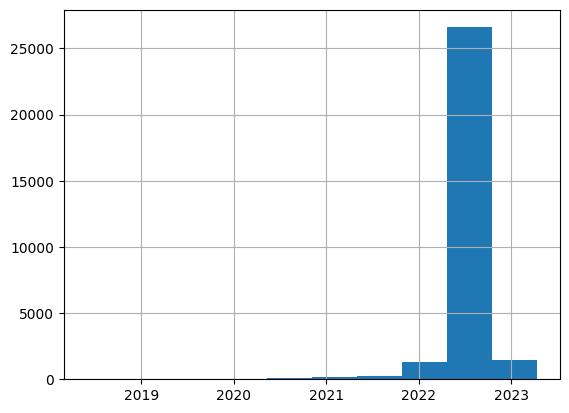

In [32]:
pd.to_datetime(change_map["0_50%"]).apply(lambda x: fractional_year(x)).hist()

In [69]:
diff = change_map["0_50%"] - pd.to_datetime(event_date)
changes_in_range = (diff.dt.days > 0) & (diff.dt.days < 30)
px.imshow(changes_in_range.values.reshape(rows, cols))

In [54]:
px.imshow(pd.to_datetime(change_map["0_50%"]).apply(lambda x: fractional_year(x)).values.reshape(rows, cols))

In [50]:
pd.to_datetime(change_map["1_mean"])

0       NaT
1       NaT
2       NaT
3       NaT
4       NaT
         ..
30667   NaT
30668   NaT
30669   NaT
30670   NaT
30671   NaT
Name: 1_mean, Length: 30672, dtype: datetime64[ns]

In [37]:
event_date

'2022-06-21'

In [ ]:
change_map